## **Import Library**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Explore Dataset**

In [ ]:
# path to the dataset directory
base_dir = '/content/drive/MyDrive/capstone2'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [ ]:
# count images in the directory
def count_images_in_directory(directory):
    total_images = 0
    for _, _, filenames in os.walk(directory):
        total_images += len(filenames)
    return total_images

dataset_count = count_images_in_directory(base_dir)
train_count = count_images_in_directory(train_dir)
val_count = count_images_in_directory(val_dir)

print(f"Total dataset: {dataset_count} images")
print(f"Training data: {train_count} images")
print(f"Validation data: {val_count} images")

Total dataset: 1100 images
Training data: 880 images
Validation data: 220 images


In [ ]:
# count images per label in the directory
def count_images_per_label(directory):
    label_counts = {}
    for label in os.listdir(directory):
        label_path = os.path.join(directory, label)
        if os.path.isdir(label_path):
            total_images_in_label = len(os.listdir(label_path))
            label_counts[label] = total_images_in_label
    return label_counts

train_label_counts = count_images_per_label(train_dir)
val_label_counts = count_images_per_label(val_dir)

print(f"Total of labels in training data: {len(train_label_counts)}")
for label, count in train_label_counts.items():
    print(f"Label: {label}, Count: {count} images")

print(f"\nTotal of labels in validation data: {len(val_label_counts)}")
for label, count in val_label_counts.items():
    print(f"Label: {label}, Count: {count} images")

Total of labels in training data: 11
Label: ringworm, Count: 80 images
Label: pyoderma, Count: 80 images
Label: keratosis, Count: 80 images
Label: nasal_discharge, Count: 80 images
Label: flea_allergy, Count: 80 images
Label: entropion, Count: 80 images
Label: leprosy, Count: 80 images
Label: scabies, Count: 80 images
Label: eyelid_lump, Count: 80 images
Label: ear_mites, Count: 80 images
Label: conjuntivis, Count: 80 images

Total of labels in validation data: 11
Label: keratosis, Count: 20 images
Label: pyoderma, Count: 20 images
Label: ringworm, Count: 20 images
Label: flea_allergy, Count: 20 images
Label: ear_mites, Count: 20 images
Label: eyelid_lump, Count: 20 images
Label: nasal_discharge, Count: 20 images
Label: leprosy, Count: 20 images
Label: scabies, Count: 20 images
Label: entropion, Count: 20 images
Label: conjuntivis, Count: 20 images


In [ ]:
# list files in training data
for dirname, _, filenames in os.walk(train_dir):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/capstone2/train/ringworm/Image_11_jpg.rf.3510c0503d35fd17d8f723a848e0c283.jpg
/content/drive/MyDrive/capstone2/train/ringworm/Image_24_jpg.rf.294aa90e63c4086ce1a5dddc9dfc567c.jpg
/content/drive/MyDrive/capstone2/train/ringworm/Image_11-2-_jpg.rf.e1d6946dce44337efeee7bbb0b10cecd.jpg
/content/drive/MyDrive/capstone2/train/ringworm/3s_png_jpg.rf.6b963f11c9fd77bb399c41c8d884790e.jpg
/content/drive/MyDrive/capstone2/train/ringworm/Image_79-2-_jpg.rf.19983f810e972e2bf3946ce03bf00955.jpg
/content/drive/MyDrive/capstone2/train/ringworm/Image_14_jpg.rf.04e5df6d5c07c60012293c8e18228267.jpg
/content/drive/MyDrive/capstone2/train/ringworm/Image_9_jpg.rf.ffc7030323ccd44f7bc5c90c00999829.jpg
/content/drive/MyDrive/capstone2/train/ringworm/Image_20_jpg.rf.f8c120917fe6098d2959e1bbc52c9ffa.jpg
/content/drive/MyDrive/capstone2/train/ringworm/ringworm-52-_jpg.rf.58c3bfd684fcd73af4e3e0ebd8a8b75b.jpg
/content/drive/MyDrive/capstone2/train/ringworm/ringworm-16-_jpg.rf.abe19a53d58549a7

In [ ]:
# list files in validation data
for dirname, _, filenames in os.walk(val_dir):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/capstone2/validation/keratosis/keratosis_local-30-_jpg.rf.94a1195299405b2520d53e46e6f4ceb7.jpg
/content/drive/MyDrive/capstone2/validation/keratosis/keratosis_00000951_jpg.rf.83c6b5b975b17ee6e6ea500bb04414f4.jpg
/content/drive/MyDrive/capstone2/validation/keratosis/keratosis_00000942_jpg.rf.a9329fcd0bb112ff620dbdd75efeb79a.jpg
/content/drive/MyDrive/capstone2/validation/keratosis/keratosis_00000967_jpg.rf.de04288ebfbeb5094981e33421af0ff4.jpg
/content/drive/MyDrive/capstone2/validation/keratosis/keratosis_local-33-_jpg.rf.cfd1e4646a6ad76563f95ef66f0e70af.jpg
/content/drive/MyDrive/capstone2/validation/keratosis/keratosis_00000953_jpg.rf.c865bd81c5f4df6a509574660a3d1333.jpg
/content/drive/MyDrive/capstone2/validation/keratosis/keratosis_local-34-_jpg.rf.2caf3757679697d698c507191388f916.jpg
/content/drive/MyDrive/capstone2/validation/keratosis/keratosis_00000964_jpg.rf.4582747c75837df0e851720cc382b42f.jpg
/content/drive/MyDrive/capstone2/validation/keratosis/keratos

## **Preprocessing Data**

In [ ]:
# batch size and image size
batch_size = 32
img_height = 224
img_width = 224

# define augmentation and normalization parameters for training data
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
  )

# define normalization parameters for validation and testing data
val_test_datagen = ImageDataGenerator(
    rescale=1.0/255
  )

# load training data
train_data = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True,
    seed=123
  )

# load validation data
val_data = val_test_datagen.flow_from_directory(
    directory=val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",
    seed=123
  )

Found 880 images belonging to 11 classes.
Found 220 images belonging to 11 classes.


In [ ]:
# get the first batch of images and labels
iterator = iter(train_data)
images, labels = next(iterator)

# display the first batch information
print(f"Shape of batch of images: {images.shape}")
print(f"Shape of batch of labels: {labels.shape}")

Shape of batch of images: (32, 224, 224, 3)
Shape of batch of labels: (32, 11)


Training images with labels:


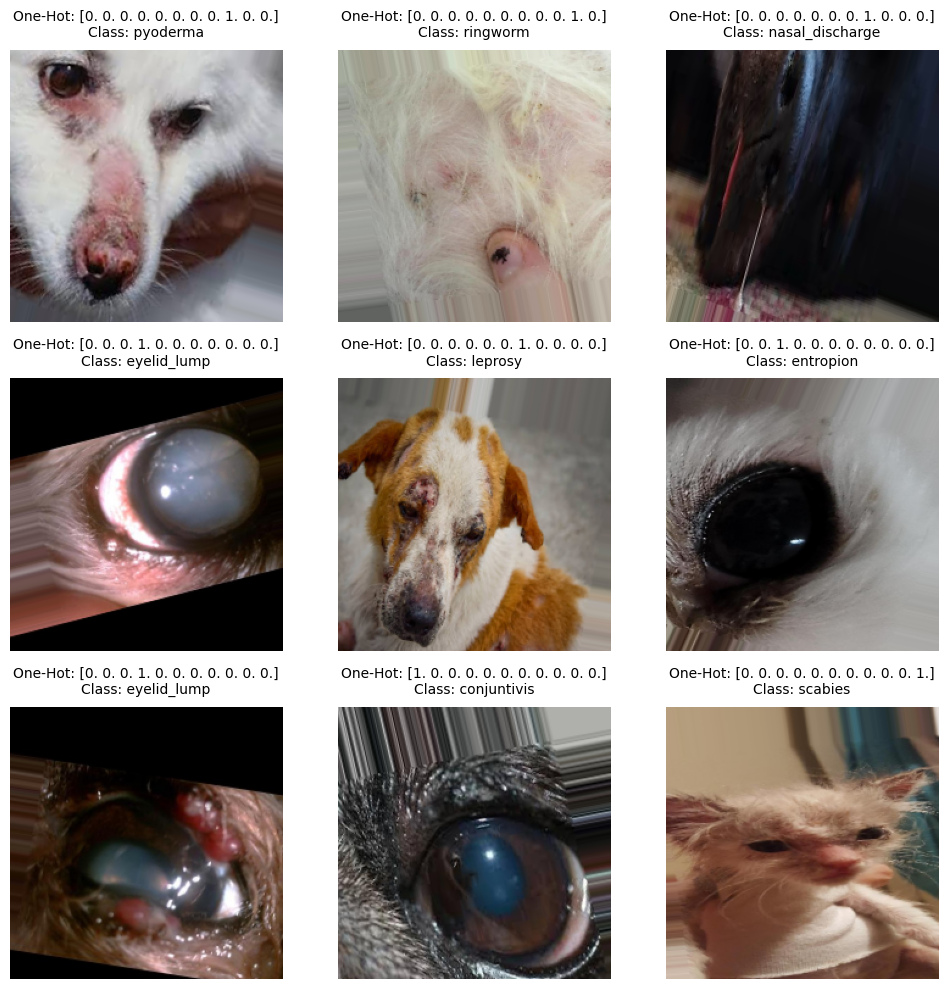


Validation images with labels:


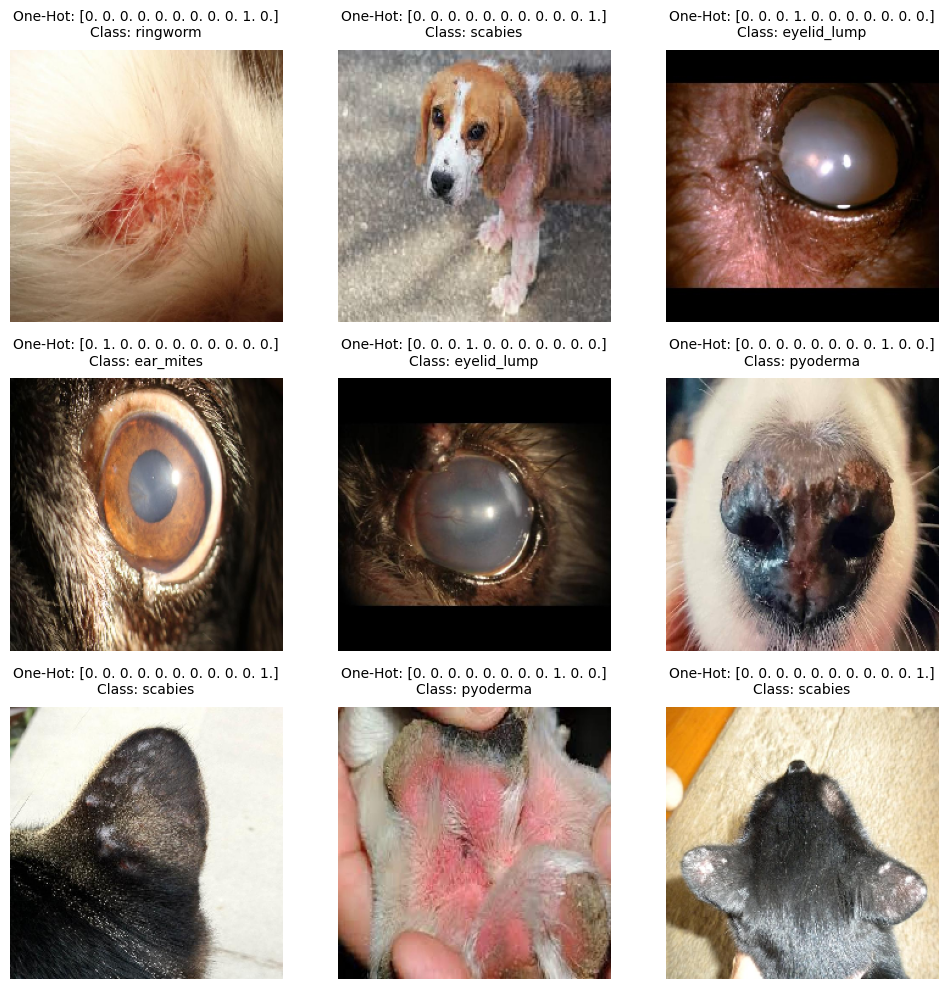

In [ ]:
# display the image along with the label
def display_images_with_labels(data, num_images=9):
    # take the first batch
    images, labels = next(data)

    plt.figure(figsize=(10, 10))
    for i in range(min(num_images, len(images))):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.axis("off")

        # display one-hot encoding
        one_hot_label = labels[i]
        # display the class name based on one-hot encoding
        class_index = np.argmax(one_hot_label)
        class_name = list(data.class_indices.keys())[class_index]

        # combine one-hot encoding and class name
        plt.title(f"One-Hot: {one_hot_label}\nClass: {class_name}", fontsize=10, pad=10)

    plt.tight_layout()
    plt.show()

print("Training images with labels:")
display_images_with_labels(train_data)

print("\nValidation images with labels:")
display_images_with_labels(val_data)

## **Modeling**

ResNet

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications.resnet50 import preprocess_input

# load ResNet50 without top layer (fully connected layer)
base_model = ResNet50(
    weights='imagenet',  
    include_top=False,    
    input_shape=(224, 224, 3)  
)

# freeze all layers in the base model
base_model.trainable = False

# add custom layer
x = base_model.output

# flatten features 
x = Flatten()(x)

# add fully connected and dropout layers
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)

x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

x = Dense(64, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

# output layer 
output = Dense(11, activation='softmax')(x)

# create model
model = Model(inputs=base_model.input, outputs=output)

# compile model
model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# prepare for early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# train the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=50,
    callbacks=[early_stopping]
)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


55/55 ━━━━━━━━━━━━━━━━━━━━ 380s 6s/step - accuracy: 0.1017 - loss: 3.1083 - val_accuracy: 0.0773 - val_loss: 3.0181
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 342s 6s/step - accuracy: 0.1366 - loss: 2.9534 - val_accuracy: 0.1000 - val_loss: 3.1286
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 346s 5s/step - accuracy: 0.1529 - loss: 2.8790 - val_accuracy: 0.0864 - val_loss: 3.5429
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 329s 6s/step - accuracy: 0.1342 - loss: 2.9006 - val_accuracy: 0.1591 - val_loss: 3.8482
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 341s 5s/step - accuracy: 0.1394 - loss: 2.8659 - val_accuracy: 0.1364 - val_loss: 2.7633
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 292s 5s/step - accuracy: 0.1526 - loss: 2.7777 - val_accuracy: 0.1545 - val_loss: 3.2167
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 316s 5s/step - accuracy: 0.1235 - loss: 2.8463 - val_accuracy: 0.1136 - val_loss: 3.8078
Epoch 8/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 320s 5s/step - accuracy: 0.1454 - loss: 2.6941 - val_accuracy: 0.0636 - val_loss: 3.

DenseNet

In [ ]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# load DenseNet121 without top layer (fully connected layer)
base_model = DenseNet121(
    weights='imagenet',   
    include_top=False,    
    input_shape=(224, 224, 3)  
)

# freeze all layers in the base model
base_model.trainable = False

# add custom layer
x = base_model.output

# flatten features 
x = Flatten()(x)

# add fully connected and dropout layers
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)

x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

# output layer 
output = Dense(11, activation='softmax')(x)

# create model
model = Model(inputs=base_model.input, outputs=output)

# compile model
model.compile(
    optimizer=Adam(learning_rate=0.0001),  
    loss='categorical_crossentropy',      
    metrics=['accuracy']                 
)

# prepare for early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',         
    patience=10,                
    restore_best_weights=True   
)

# train model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=50,                  
)

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 292s 10s/step - accuracy: 0.1372 - loss: 3.0358 - val_accuracy: 0.2591 - val_loss: 2.6830
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 351s 11s/step - accuracy: 0.2774 - loss: 2.3397 - val_accuracy: 0.3682 - val_loss: 2.1343
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 286s 9s/step - accuracy: 0.3677 - loss: 1.9562 - val_accuracy: 0.4318 - val_loss: 1.7931
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 319s 9s/step - accuracy: 0.4075 - loss: 1.8019 - val_accuracy: 0.4955 - val_loss: 1.6326
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 265s 9s/step - accuracy: 0.4875 - loss: 1.5791 - val_accuracy: 0.5318 - val_loss: 1.5244
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 263s 9s/step - accuracy: 0.4544 - loss: 1.5834 - val_accuracy: 0.5364 - val_loss: 1.2825
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 298s 10s/step - accuracy: 0.4573 - loss: 1.6302 - val_accuracy: 0.5591 - val_loss: 1.1710
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 288s 9s/step - accu